<a href="https://colab.research.google.com/github/Aathith-S/Aathith-S/blob/main/DogVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

End to end multi class Dog breed classification

Using Tenserflow 2 and Tenserflow

##1) problem
##2) data
Data we're using is from kaggle's dog breed identification
##3) evaluation
##4) Features
There are 10000 images in training set(these images has labels)
There are 10000 images in test set(these images has no labels)

get our workspace ready

import Tenserflow 2.x

import tenserflow hub

make sure we're using a GPU

In [1]:
#import necessary into colab
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:",tf.__version__)
print("HUB version",hub.__version__)

TF version: 2.11.0
HUB version 0.12.0


In [2]:
# Run this cell if TensorFlow 2.x isn't the default in Colab
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSSS!!!!!)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/~../Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

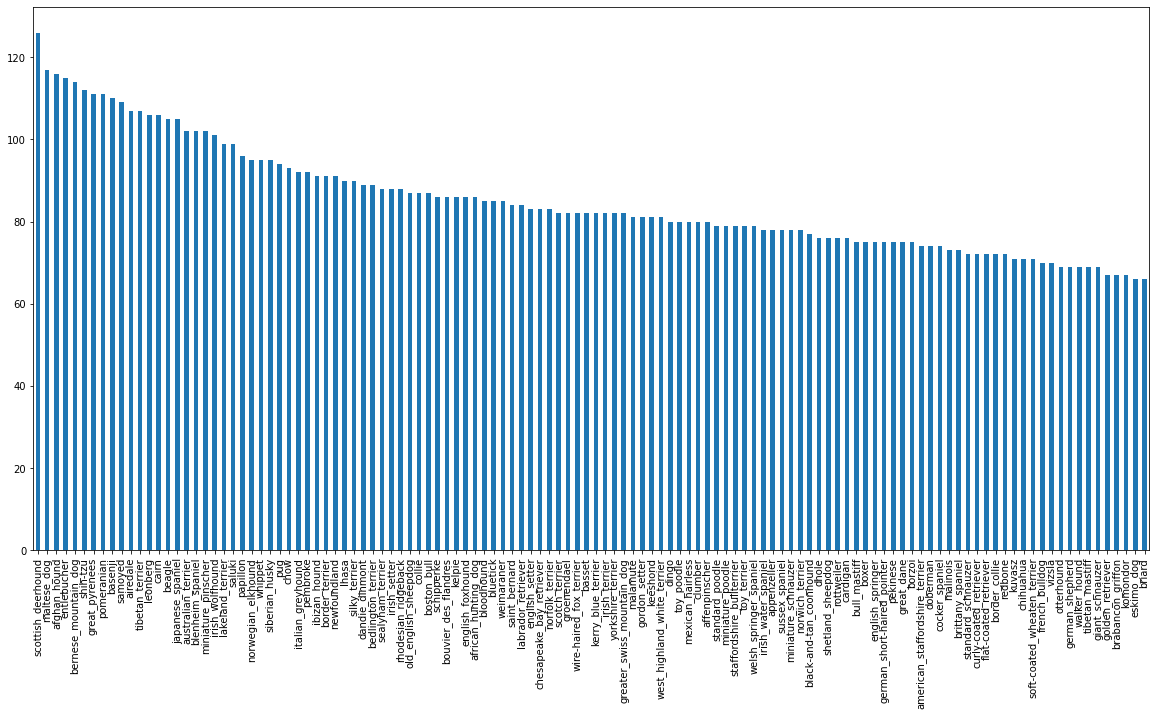

In [7]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [8]:
# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

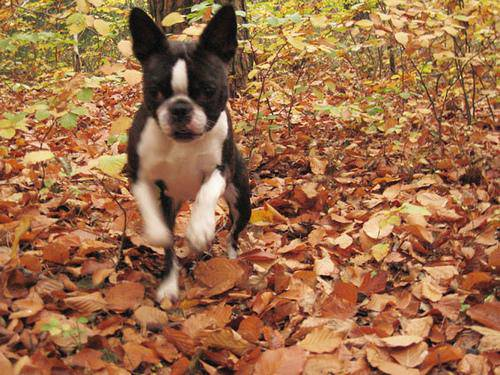

In [9]:
from IPython.display import Image
Image("drive/MyDrive/~../Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

Getting images and their labels Let's get a list of all of our image file pathnames.

In [10]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/~../Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/MyDrive/~../Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/~../Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/~../Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/~../Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/~../Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/~../Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/~../Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/~../Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/~../Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/~../Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/~../Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


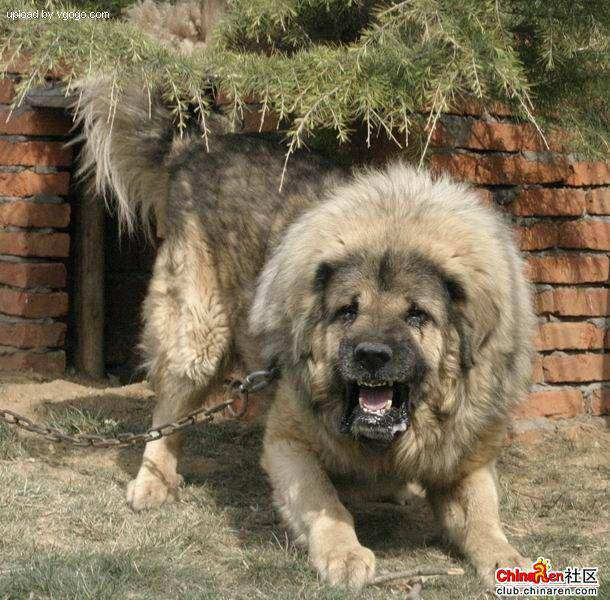

In [12]:
Image(filenames[9000])

In [13]:
import numpy as np
labels = labels_csv["breed"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [15]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [17]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
len(labels)

10222

In [20]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
len(boolean_labels)

10222

In [22]:
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [23]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own validation set Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own

In [24]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [25]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [26]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [27]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/MyDrive/~../Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/~../Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/~../Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/~../Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/~../Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, F

Preprocessing Images (turning images into Tensors) To preprocess our images into Tensors we're going to write a function which does a few things:

Take an image filepath as input

Use TensorFlow to read the file and save it to a variable, image

Turn our image (a jpg) into Tensors

Normalize our image (convert color channel values from from 0-255 to 0-1).

Resize the image to be a shape of (224, 224)

Return the modified image

Before we do, let's see what importing an image looks like.


In [28]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [29]:
image.max(), image.min()

(255, 0)

In [30]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

Take an image filepath as input

Use TensorFlow to read the file and save it to a variable, image

Turn our image (a jpg) into Tensors

Normalize our image (convert color channel values from from 0-255 to 0-1).

Resize the image to be a shape of (224, 224)

Return the modified image

In [31]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

Turning our data into batches Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image, label)

In [32]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [33]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [34]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [35]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [36]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Visualizing Data Batches Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!


In [37]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [38]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

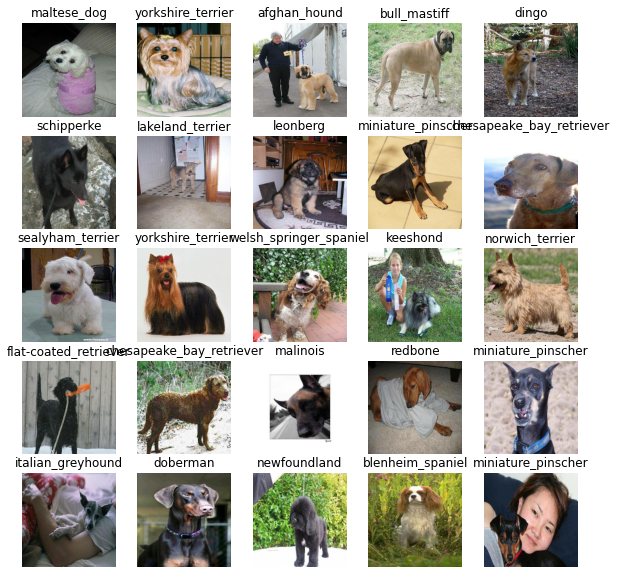

In [39]:
# # Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

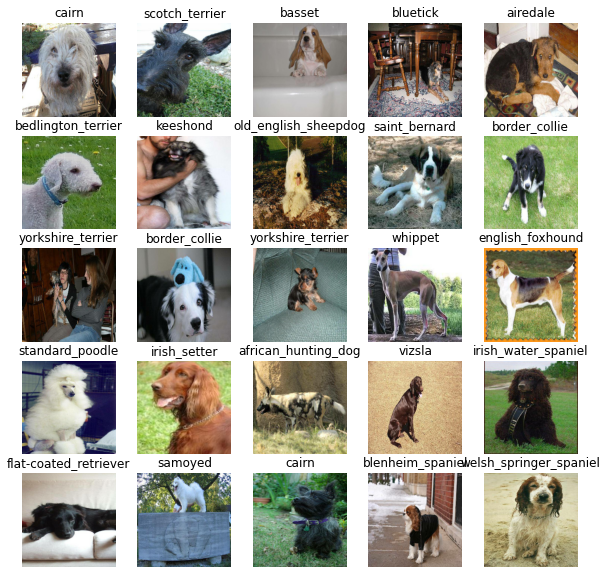

In [40]:
valid_images, valid_labels = next(val_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

Building a model Before we build a model, there are a few things we need to define:

The input shape (our images shape, in the form of Tensors) to our model. The output shape (image labels, in the form of Tensors) of our model. The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [41]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters. Defines the layers in a Keras model in sequential fashion (do this first, then this, then that). Compiles the model (says it should be evaluated and improved). Builds the model (tells the model the input shape it'll be getting). Returns the model. All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [42]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [43]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


Creating callbacks Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

TensorBoard Callback To setup a TensorBoard callback, we need to do 3 things:

Load the TensorBoard notebook extension ✅ Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅ Visualize our models training logs with the %tensorboard magic function (we'll do this after model training). https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [44]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [45]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/~../Dog Vision/Logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Early Stopping Callback Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [46]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [47]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [48]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


Let's create a function which trains a model.

Create a model using create_model() Setup a TensorBoard callback using create_tensorboard_callback() Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use Return the model

In [49]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [50]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 127s 3s/step - loss: 4.5973 - accuracy: 0.0975 - val_loss: 3.4469 - val_accuracy: 0.2950
Epoch 2/100
25/25 [==============================] - 3s 119ms/step - loss: 1.6065 - accuracy: 0.7088 - val_loss: 2.1195 - val_accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 3s 117ms/step - loss: 0.5562 - accuracy: 0.9400 - val_loss: 1.6701 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 4s 161ms/step - loss: 0.2475 - accuracy: 0.9887 - val_loss: 1.4769 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 5s 213ms/step - loss: 0.1446 - accuracy: 0.9950 - val_loss: 1.4154 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 7s 266ms/step - loss: 0.0996 - accuracy: 1.0000 - val_loss: 1.3673 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================]

our model is overfitting 

ways to prevent overfitting

In [51]:
### checking the tensorboard logs

%tensorboard --logdir drive/MyDrive/~../Dog\ Vision/Logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [52]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [53]:
#make prediction on the validation data(not used on train on)
predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 90ms/step


array([[8.57846870e-04, 8.24324525e-05, 5.73589234e-04, ...,
        2.20252783e-04, 2.59018670e-05, 2.93860747e-03],
       [3.92944505e-03, 5.37284010e-04, 5.52131003e-03, ...,
        2.19758833e-03, 1.24727341e-03, 1.21593235e-04],
       [1.28314668e-05, 5.68347205e-05, 7.88038619e-07, ...,
        6.13311749e-06, 1.22992033e-05, 3.51819675e-04],
       ...,
       [2.23365555e-06, 7.15538117e-05, 1.73793669e-05, ...,
        3.48582284e-06, 2.11474144e-05, 8.03995954e-06],
       [1.05147157e-02, 1.17902498e-04, 4.44558798e-04, ...,
        1.29695851e-04, 8.79940271e-05, 3.62662598e-03],
       [5.83577261e-04, 1.74039087e-05, 1.10011140e-03, ...,
        9.46325995e-03, 4.58534749e-04, 1.37414809e-05]], dtype=float32)

In [54]:
predictions.shape

(200, 120)

In [55]:
np.sum(predictions[0])

1.0

In [56]:
np.sum(predictions[1])

1.0

In [57]:
#first prediction
index=1
print(predictions[index])
print(f"Max value (probability of prediction):{np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"predicted label:{unique_breeds[np.argmax(predictions[index])]}")

[3.92944505e-03 5.37284010e-04 5.52131003e-03 5.31878206e-04
 1.52174360e-03 2.81277025e-05 3.99844302e-03 8.12976214e-04
 9.98032861e-04 2.76547449e-04 1.74324989e-04 2.19404888e-06
 2.10332917e-04 5.50999503e-05 3.06977483e-04 6.45881519e-04
 1.71880471e-03 3.19003419e-04 4.49040272e-05 2.28078658e-04
 3.58940626e-04 3.28827373e-05 5.32943486e-05 1.08562046e-04
 2.38962704e-04 1.01637779e-04 1.42077208e-01 6.74467348e-03
 1.17620788e-04 8.46061623e-04 7.91652419e-05 1.93908272e-04
 2.06673794e-04 5.50084587e-06 1.94729029e-04 2.89910880e-04
 1.08830725e-04 2.38948385e-03 1.30218687e-04 1.88247814e-05
 9.86613333e-04 1.73681634e-04 3.57027893e-05 1.35889641e-04
 4.80088027e-04 2.77202670e-03 4.21102566e-04 7.63789285e-05
 1.69378091e-02 3.56880191e-05 3.97456188e-06 9.98789328e-04
 2.16099652e-05 5.88132789e-05 6.91914407e-04 2.79770736e-02
 2.02468102e-04 2.65871435e-02 1.25143881e-04 1.84223382e-03
 5.66596515e-04 2.38557877e-05 1.21086843e-04 5.21538022e-05
 4.49847616e-03 3.022561

In [58]:
unique_breeds[96]

'scotch_terrier'

Having the above functionality is great but we want to be able to do it at scale

And it would be even better if we could see the image predictionis being made on!


In [59]:
#turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

#get a predicted label based on an array of prediction probabilities
pred_label=get_pred_label(predictions[0])
pred_label

'cairn'

Now since our validation data is still in a batch dataset,we'll have to unbatch it to make prediction on validation images and compare those prediction to yhe validation labels

In [60]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [61]:
#create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns and returns separate arrays
  of images and labels
  """
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [62]:
get_pred_label(val_labels[0])

'affenpinscher'

In [63]:
images_=[]
labels_=[]

for image,label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

In [64]:
images_[0],labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [65]:
get_pred_label(labels_[0])

'cairn'

In [66]:
get_pred_label(predictions[0])

'cairn'

Now we got ways to get

*prediction labels

*validation labels(truth labels)

*validation images

##We'll create a function which:

*Takes an array of prediction probabilities, an array of truth labels and an array of integers and images

*Convert the prediction probabilities to a predicted labels.

*plot the predicted label ,its predicted probabilities, the truth tables and the target imageson a single plot

In [67]:
#let's make a function to visualize
def plot_pred(prediction_probabilities,images,labels,n=1):
  """
  view the prediction,ground truth and image for sample n
  """
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  #get the pred label
  pred_label=get_pred_label(pred_prob)

  #plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #change the colour if predict is right
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #change plot title
  plt.title("{}    {:2.0f}%    {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),color=color)


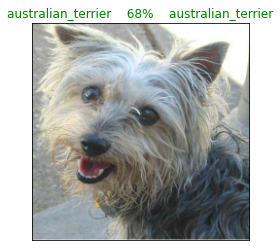

In [68]:

plot_pred(prediction_probabilities=predictions,
          images=val_images,
          labels=val_labels,
          n=98)

Now we got one function to visualize our models top prediction .let's make its out

The function will:

*takes an input of prediction probabilities array and a ground truth array and an integer

*Find the prediction using 'get_pred_label'

*find top 10
  
      *prediction probabilities index

      *prediction probabilities values

      *prediction labels

*plot top 10

In [72]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  get the top 10 predicted labels along with truth labels
  """
  pred_prob,true_label=prediction_probabilities[n],labels[n]

  pred_label=get_pred_label(pred_prob)

  #find top 10 predictions
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]

  #find top 10 prediction confidence values
  top_10_pred_values=pred_prob[top_10_pred_indexes]

  #top 1- prediction labels
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  #setup the plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,color="grey")

  plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation="vertical")

  #change color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass






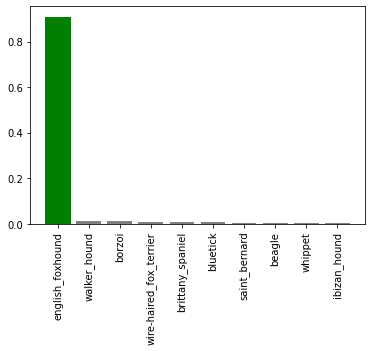

In [74]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=90)

Now we've got some function to help us visualize our predictions and evaluate our model

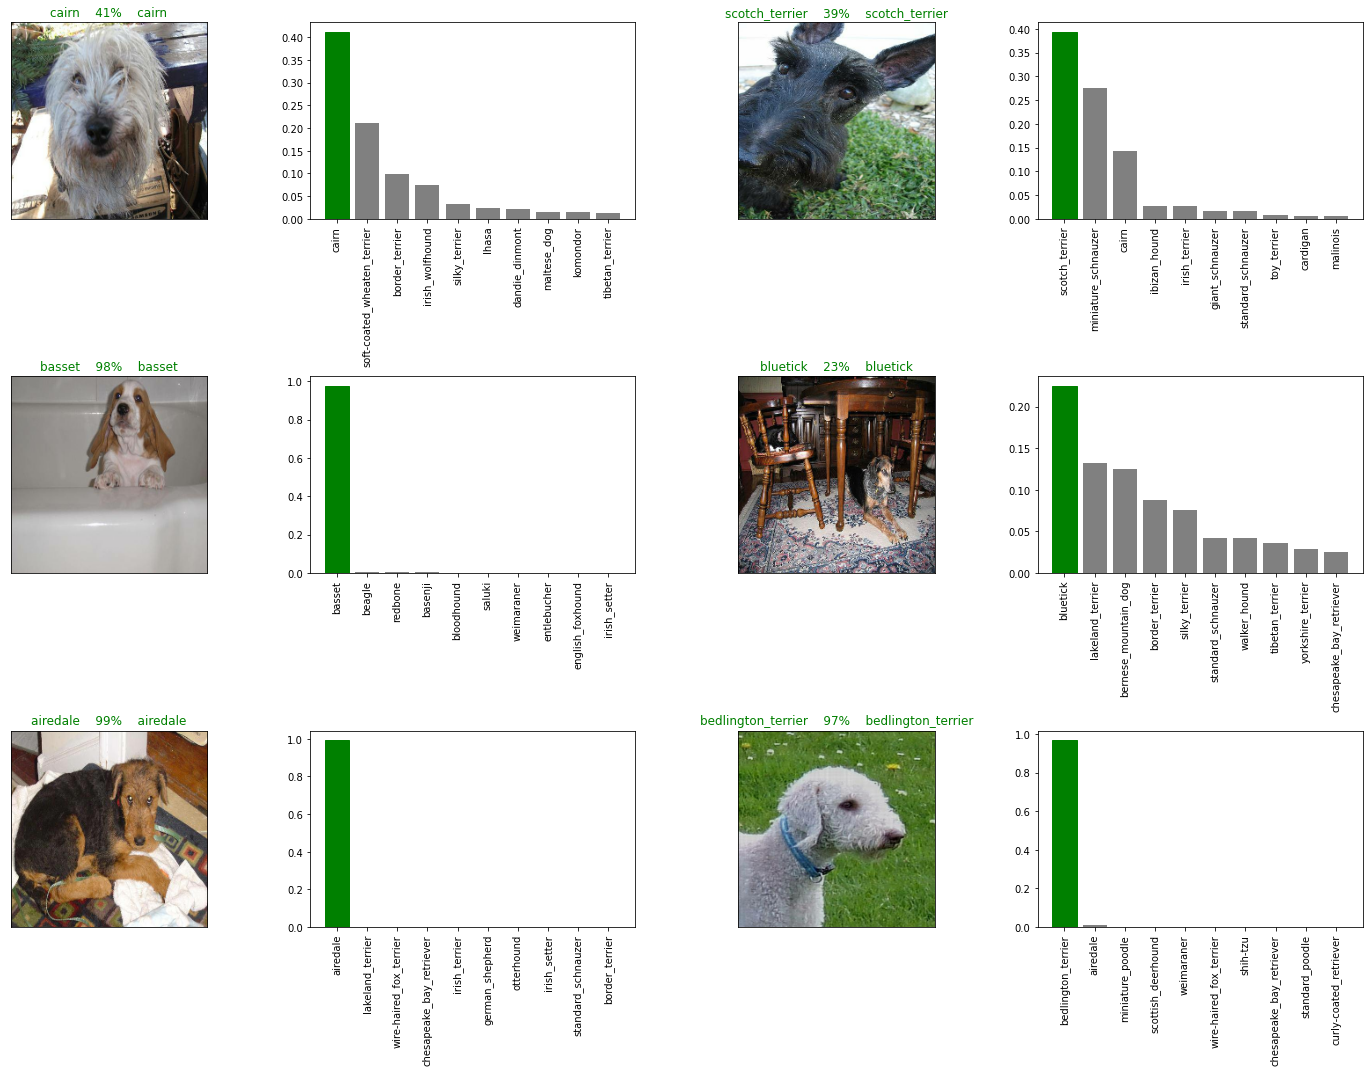

In [83]:
#let's check out few prediction
i_multiplier = 0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0) 
plt.show()